# Identifying Pneumonia with Deep Learning
***
Author: Andre Layton
***

# Overview
.......

# Business Problem
........

***
<img src="https://media.licdn.com/dms/image/D4D12AQEqfniioS4KVQ/article-cover_image-shrink_720_1280/0/1677311223167?e=2147483647&v=beta&t=loMCjRjjqYyKI72mjdbVk5_XbxRdzonIKz0qRn-BcXo" style="height:500px; width:875px" />

In [16]:
# Import all the necessary libraries
from tensorflow.keras.utils import get_file
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create directory path objects
train_data_dir = 'data/chest_xray/train'
test_data_dir = 'data/chest_xray/test'
validation_dir = 'data/chest_xray/val'

# Gather and reshape the data in each directory object
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64, 64), batch_size=5216)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(64, 64), batch_size=624)
val_generator = ImageDataGenerator().flow_from_directory(validation_dir, target_size=(64, 64), batch_size=16)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


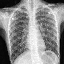

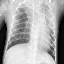

In [3]:
# Preview some images
display(array_to_img(train_images[17]))
array_to_img(train_images[4200])

In [4]:
# Preview the shape of the data
print("Train Data Shape:")
print(np.shape(train_images))
print(np.shape(train_labels))
print("\nTest Data Shape:")
print(np.shape(test_images))
print(np.shape(test_labels))
print("\nValidation Data Shape:")
print(np.shape(val_images))
print(np.shape(val_labels))

Train Data Shape:
(5216, 64, 64, 3)
(5216, 2)

Test Data Shape:
(624, 64, 64, 3)
(624, 2)

Validation Data Shape:
(16, 64, 64, 3)
(16, 2)


In [5]:
# Reshape the train, test, and validation images 
train_img_unrow = train_images.reshape(5216, -1).T
test_img_unrow = test_images.reshape(624, -1).T
val_img_unrow = val_images.reshape(16, -1).T

# Preview the shape of each newly-formed objects
print(np.shape(train_img_unrow))
print(np.shape(test_img_unrow))
print(np.shape(val_img_unrow))

(12288, 5216)
(12288, 624)
(12288, 16)


In [6]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
# Reshape the label datasets, and select the 'PNEUMONIA' column
train_labels_final = train_labels.T[[1]]
test_labels_final = test_labels.T[[1]]
val_labels_final = val_labels.T[[1]]

# Check the shape of the transformed labels 
print(np.shape(train_labels_final))
print(np.shape(test_labels_final))
print(np.shape(val_labels_final))

(1, 5216)
(1, 624)
(1, 16)


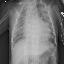

[1.]


In [13]:
# Confirm if the image matches the corresponding label
display(array_to_img(train_images[1400]))
print(train_labels_final[:, 1400])

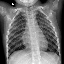

[0.]


In [14]:
# Confirm if the image matches the corresponding label
display(array_to_img(train_images[14]))
print(train_labels_final[:, 14])

In [15]:
# Standardize the datasets
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255
val_img_final = val_img_unrow/255

numpy.ndarray

In [17]:
baseline_model = Sequential()
baseline_model.add(Dense(64, activation='relu', input_shape=(5216,)))
baseline_model.add(Dense(2, activation='sigmoid'))

In [18]:
baseline_model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])

In [19]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                333888    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 334,018
Trainable params: 334,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Reshape X or Y first!!
l = x.shape[1]

In [23]:
baseline_results = baseline_model.fit(train_img_final, train_labels_final, epochs=24, batch_size=100,
                                      validation_data=(val_img_final, val_labels_final))

ValueError: Data cardinality is ambiguous:
  x sizes: 12288
  y sizes: 1
Please provide data which shares the same first dimension.